### For the 2013 season, is there a linear relationship between  how often a rider placed in the top 10 and the number of times he stayed on his bull for a full 8 seconds?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#plt.style.use('ggplot')
sns.set_theme()

In [2]:
buldata = pd.read_csv('BullRiders.csv')
buldata.head()

,Rider,Rank15,Country,YearBorn,Height,Weight,YearsPro,Events14,BuckOuts14,Rides14,...,BuckOuts12,Rides12,CupPoints12,Rank12,RidePer12,Wins12,Top5_12,Top10_12,FinalPoints12,Earnings12
0,Joao Ricardo Vieira,1,BRA,1984,66,163,3,28,93,41,...,0,0,0.00,0,0.00,0,0,0,0.0,0.00
1,Matt Triplett,2,USA,1991,67,160,4,28,86,33,...,0,0,0.00,0,0.00,0,0,0,0.0,0.00
2,J.B. Mauney,3,USA,1987,70,140,10,22,63,25,...,82,40,9273.25,8,0.49,3,8,13,287.0,313340.27
3,Kaique Pacheco,4,BRA,1994,68,145,2,1,1,0,...,0,0,0.00,0,0.00,0,0,0,0.0,0.00
4,Nathan Schaper,5,USA,1990,73,160,6,15,41,17,...,0,0,0.00,0,0.00,0,0,0,0.0,0.00


In [3]:
# How many of the 10 first riders have been pro for 10 years or more
(buldata['YearsPro'][0:11] >= 10).sum()

3

In [4]:
# Of the top 15 riders so far in 2015, how many rides were completed by the rider 
# with the fewest buck-outs in 2014?

print('Rider with fewest buck-outs in 2014 (top 15):')
print(buldata.head(15).iloc[buldata['BuckOuts14'].idxmin(),:].Rider)
print('# of rides')
buldata[ buldata.Rider == 'Kaique Pacheco']['Rides14'].values[0]

Rider with fewest buck-outs in 2014 (top 15):
Kaique Pacheco
# of rides


0

In [5]:
# 1. Create a subset of the data which contains only those riders that have participated in 
# at least one event in 2013.

particIn13 = buldata[buldata['Events13'] > 0]

<Axes: xlabel='Rides13', ylabel='Top10_13'>

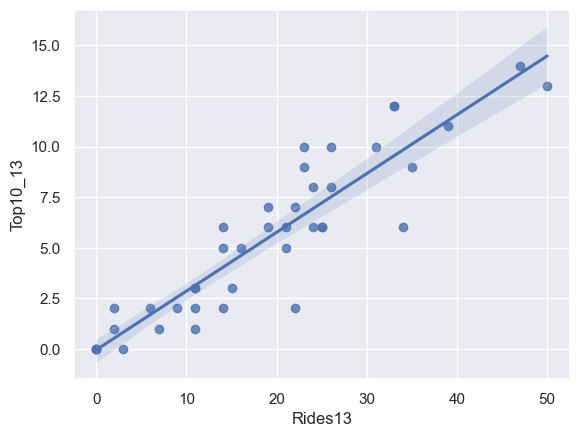

In [6]:
# 2-.Create a scatterplot of the two variables of interest.
# 3. Check to see that the relationship is linear.  Plot a line of best fit as a guide.

sns.regplot(x=particIn13.Rides13, y=particIn13.Top10_13)

In [7]:
# 4. If the relationship is linear, calculate the correlation coefficient.

particIn13.Rides13.corr(particIn13.Top10_13)

0.916605952978041

mean:  18.73170731707317
median:  19.0


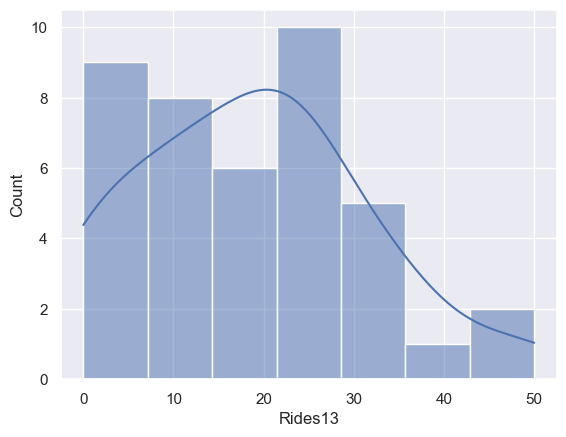

In [8]:
# On average, a bull rider in 2013 has how many rides? (Report the median becuase the histogram is not symmetrical.)
sns.histplot(particIn13.Rides13, kde=True)
print('mean: ', particIn13.Rides13.mean())
print('median: ', particIn13.Rides13.median())

In [9]:
# These bull riders made it into the Top 10 an average of ________ times in 2013. 
particIn13['Top10_13'].median()

6.0

## The Lab 
### In 2012, which variable had the strongest linear relationship with Earnings:  Ride Percentage or Cup Points?

In [10]:
# get riders that were active in 2012
participIn12 = buldata[buldata.Events12 > 0]

<Axes: xlabel='Earnings12', ylabel='Count'>

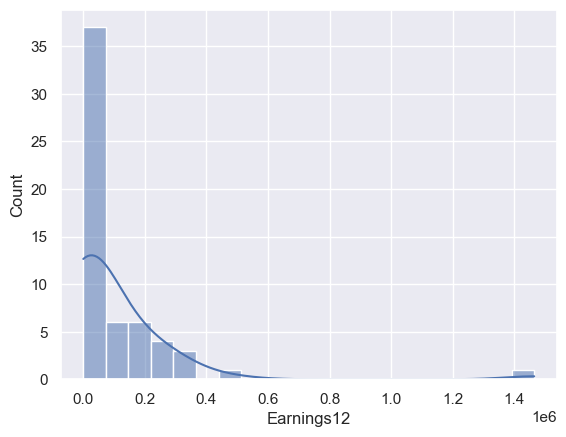

In [11]:
# What is the shape of the Earnings distribution for 2012?
sns.histplot(buldata.Earnings12, kde=True)

In [12]:
# What was the average amount earned by a bull rider?
participIn12.Earnings12.median()

147952.34

Correlation:  0.5934109564110922


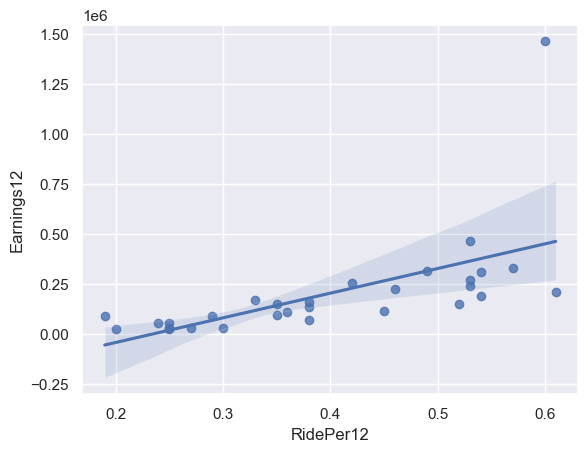

In [13]:
sns.regplot(x=participIn12.RidePer12, y=participIn12.Earnings12)
print('Correlation: ',participIn12.RidePer12.corr(participIn12.Earnings12))

Correlation:  0.6569363258733382


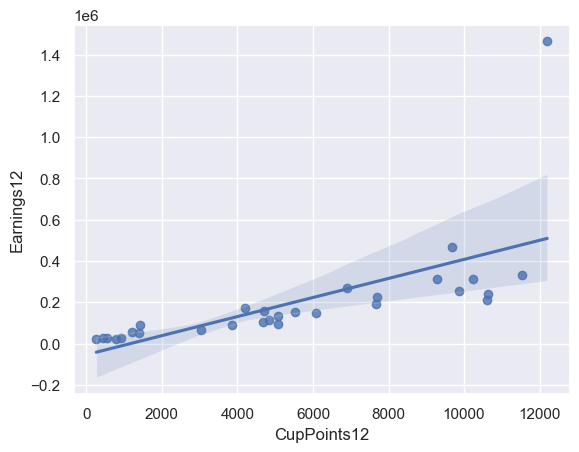

In [14]:
sns.regplot(x=participIn12.CupPoints12, y=participIn12.Earnings12)
print('Correlation: ', participIn12.CupPoints12.corr(participIn12.Earnings12))

In [15]:
# the one who earned more in 2012 
participIn12.loc[participIn12.Earnings12.idxmax(),:]

Rider                 Silvano Alves
Rank15                            8
Country                         BRA
YearBorn                       1987
Height                           67
Weight                          150
YearsPro                          7
Events14                         28
BuckOuts14                       92
Rides14                          50
CupPoints14                 9004.06
Rank14                            1
RidePer14                    0.5435
RidesPer_45bull_14           0.3333
Rides90pts_14                     1
Wins14                            0
Top5_14                           7
Top10_14                         12
FinalPoints14                3607.0
Earnings14               1422602.65
Events13                         27
BuckOuts13                       91
Rides13                          50
CupPoints13                10937.75
Rank13                            2
RidePer13                    0.5495
RidesPer_45bull_13              0.2
Rides90pts_13               

In [16]:
# removing the previous outlier
particIn12 = participIn12.drop(participIn12.Earnings12.idxmax())

New Rides-Earnings Correlation w/o outlier:  0.8035573600823024


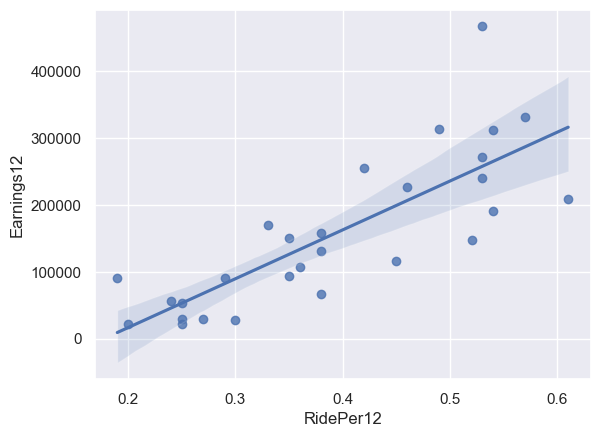

In [17]:
sns.regplot(x=particIn12.RidePer12, y=particIn12.Earnings12)
print('New Rides-Earnings Correlation w/o outlier: ',particIn12.RidePer12.corr(particIn12.Earnings12))

Cup Points-Earnings Correlation w/o outlier:  0.8929207859056749


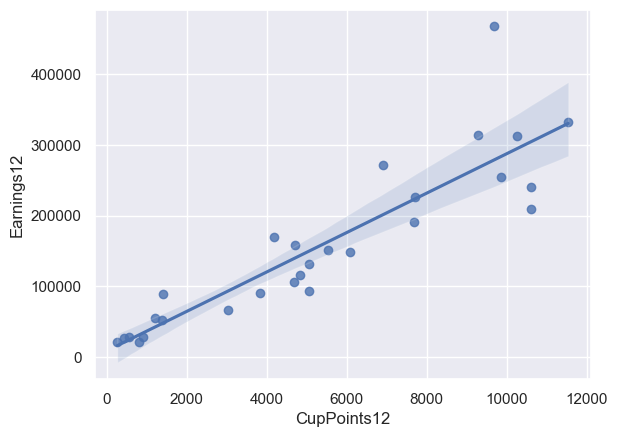

In [18]:
sns.regplot(x=particIn12.CupPoints12, y=particIn12.Earnings12)
print('Cup Points-Earnings Correlation w/o outlier: ', particIn12.CupPoints12.corr(particIn12.Earnings12))

### Problem Set

In [19]:
# riders with at least one ride in 2014
rideIn14 = buldata[buldata.Rides14 > 0]

In [20]:
# average of rides per event for riders in 2014
ridesPerEvent14 = rideIn14.Rides14 / rideIn14.Events14

[Text(0.5, 0, 'Rides per event'), Text(0, 0.5, 'Rider count')]

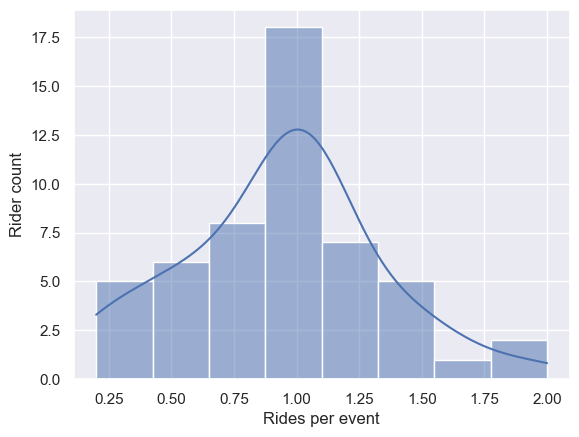

In [21]:
sns.histplot(ridesPerEvent14, kde=True).set(xlabel='Rides per event', ylabel='Rider count')
# most riders have around a single ride per event

In [22]:
print('Max: ',ridesPerEvent14.max())
print('Min: ',ridesPerEvent14.min())
print('Median: ',ridesPerEvent14.median())

Max:  2.0
Min:  0.2
Median:  1.0


Correlation:  -0.49451525363696375


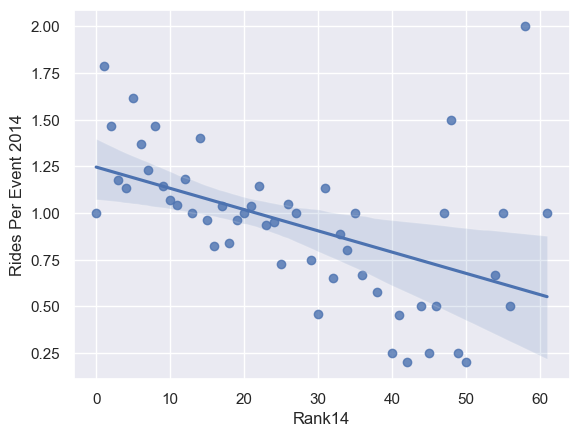

In [23]:
sns.regplot(x=rideIn14.Rank14, y=ridesPerEvent14).set(ylabel='Rides Per Event 2014')
print('Correlation: ', rideIn14.Rank14.corr(ridesPerEvent14))

In [24]:
# The exercise is study the correlation between study time and a exam score
p2 = {
    'MinStudying': [
        30,
        45,
        180,
        95,
        130,
        140,
        30,
        80,
        60,
        110,
        0,
        80], 
    'examScore':[
        64,
        68,
        87,
        90,
        94,
        84,
        92,
        88,
        82,
        93,
        65,
        90]
}

p2df = pd.DataFrame(data=p2)

In [25]:
p2df.MinStudying.corr(p2df.examScore)

0.6097055820038042

<Axes: xlabel='MinStudying', ylabel='examScore'>

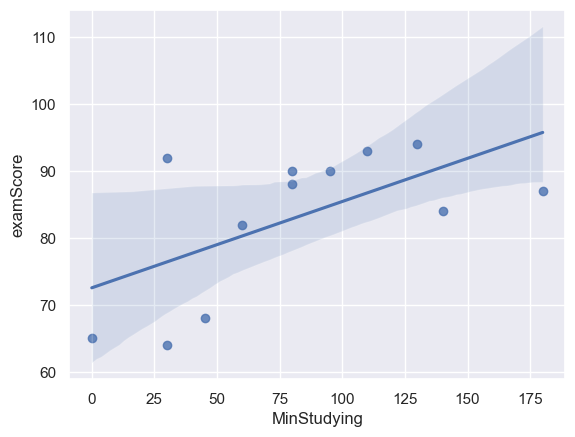

In [26]:
sns.regplot(x=p2df.MinStudying, y=p2df.examScore)

In [27]:
outlier = p2df[(p2df.MinStudying == 30) & (p2df.examScore == 92)]
p2df.drop(outlier.index[0], inplace=True)

In [28]:
p2df.MinStudying.corr(p2df.examScore)

0.7484742873656346

[Text(0.5, 0, 'Minutes of study'), Text(0, 0.5, 'Exam score')]

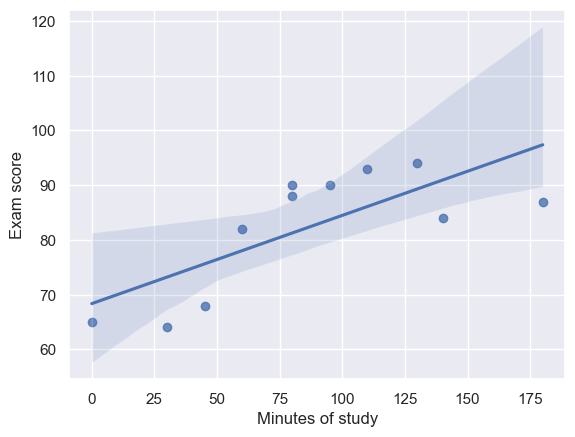

In [29]:
sns.regplot(x=p2df.MinStudying, y=p2df.examScore).set(xlabel='Minutes of study', ylabel='Exam score')